In [1]:
import numpy as np
import pandas as pd
import librosa as lr
import librosa.display as lrd
import IPython.display as ipd
import matplotlib.pyplot as plt

from pypesq import pesq
from pesq import pesq as pesq2

import scipy.stats as stats

In [2]:
workspace = '/import/vision-eddydata/dm005_tmp'

In [3]:
noise_name = 'n122'
#clean_name = 'DR1/FAKS0/SA1.WAV'
clean_name = 'DR6/FLNH0/SI1214.WAV'

noise = f'../../../datasets/noises-test-drones/{noise_name}.wav'
clean = f'../../../datasets/TIMIT/data/TEST/{clean_name}.wav'
mixed = f'/import/vision-eddydata/dm005_tmp/mixed_audios/spectrogram/test/-15db/{clean_name}.{noise_name}.wav'
enh_1 = f'/import/vision-eddydata/dm005_tmp/enh_wavs/test/MD3/-15db/{clean_name}.{noise_name}.enh.wav'
enh_2 = f'/import/vision-eddydata/dm005_tmp/enh_wavs/test/denoiser/-15db/{clean_name}.{noise_name}.wav_enhanced.wav'
enh_3 = f'/import/vision-eddydata/dm005_tmp/enh_wavs/test/dcunet-16-v2/-15db/{clean_name}.{noise_name}.enh.wav'
enh_4 = f'/import/vision-eddydata/dm005_tmp/enh_wavs/test/dccrn-v2/-15db/{clean_name}.{noise_name}.enh.wav'

In [4]:
sr = 16000
noise_wav, _ = lr.load(noise, sr=sr)
clean_wav, _ = lr.load(clean, sr=sr)
mixed_wav, _ = lr.load(mixed, sr=sr)
enh1_wav, _ = lr.load(enh_1, sr=sr)
enh2_wav, _ = lr.load(enh_2, sr=sr)
enh3_wav, _ = lr.load(enh_3, sr=sr)
enh4_wav, _ = lr.load(enh_4, sr=sr)

In [5]:
from pypesq import pesq
from pesq import pesq as pesq2

def __pesq(ref, deg, sr=16000):
    print(len(ref), len(deg))
    if len(ref) < len(deg):
        ref = np.pad(ref, (0, len(deg) - len(ref)))
    elif len(deg) < len(ref):
        deg = np.pad(deg, (0, len(ref) - len(deg)))
    
    return pesq(ref, deg, sr)

def __pesq2(ref, deg, sr=16000, mode='nb'):
    print(len(ref), len(deg))
    if len(ref) < len(deg):
        ref = np.pad(ref, (0, len(deg) - len(ref)))
    elif len(deg) < len(ref):
        deg = np.pad(deg, (0, len(ref) - len(deg)))
    
    return pesq2(sr, ref, deg, mode)

In [6]:
print(__pesq(clean_wav, enh1_wav))
print(__pesq(clean_wav, enh2_wav))
print(__pesq(clean_wav, enh3_wav))
print(__pesq(clean_wav, enh4_wav))

41780 41728
1.1092156171798706
41780 41780
0.31542229652404785
41780 41780
0.7436267733573914
41780 41780
1.1206523180007935


In [7]:
print(__pesq2(clean_wav, enh1_wav))
print(__pesq2(clean_wav, enh2_wav))
print(__pesq2(clean_wav, enh3_wav))
print(__pesq2(clean_wav, enh4_wav))

41780 41728
1.1884984970092773
41780 41780
1.0612887144088745
41780 41780
1.110242247581482
41780 41780
1.1907254457473755


In [8]:
print(__pesq2(clean_wav, enh1_wav, mode='wb'))
print(__pesq2(clean_wav, enh2_wav, mode='wb'))
print(__pesq2(clean_wav, enh3_wav, mode='wb'))
print(__pesq2(clean_wav, enh4_wav, mode='wb'))

41780 41728
1.0565054416656494
41780 41780
1.0312186479568481
41780 41780
1.0246776342391968
41780 41780
1.0324549674987793


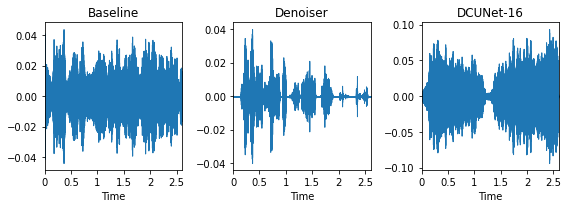

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
lrd.waveplot(enh1_wav, sr=16000, ax=axes[0])
lrd.waveplot(enh2_wav, sr=16000, ax=axes[1])
lrd.waveplot(enh3_wav, sr=16000, ax=axes[2])
axes[0].title.set_text('Baseline')
axes[1].title.set_text('Denoiser')
axes[2].title.set_text('DCUNet-16')
fig.tight_layout()
plt.savefig('enhanced_audios.pdf', bbox_inches='tight')
plt.show()


In [10]:
def show_wav(wav):
    lrd.waveplot(wav, sr=sr)
    return ipd.Audio(wav, rate=sr)

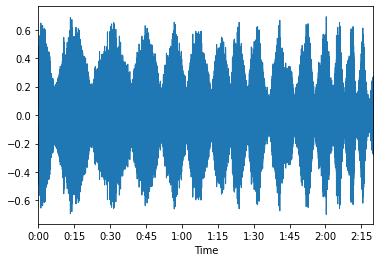

In [11]:
show_wav(noise_wav)

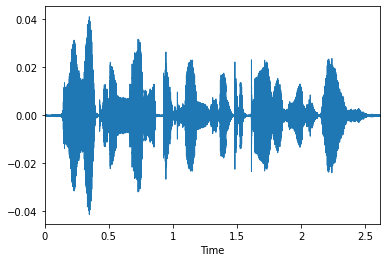

In [12]:
show_wav(clean_wav)

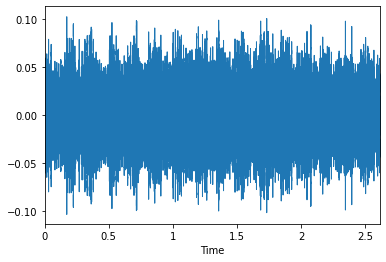

In [13]:
show_wav(mixed_wav)

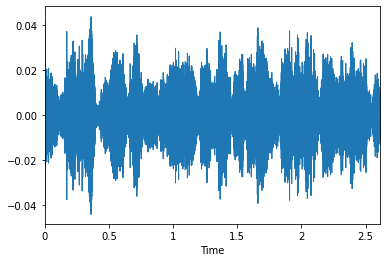

In [14]:
show_wav(enh1_wav)

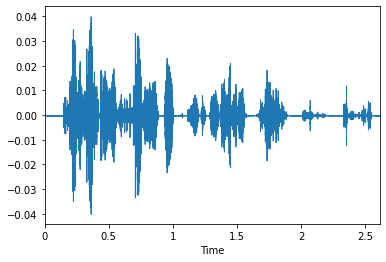

In [15]:
show_wav(enh2_wav)

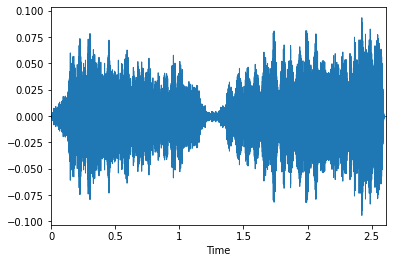

In [16]:
show_wav(enh3_wav)

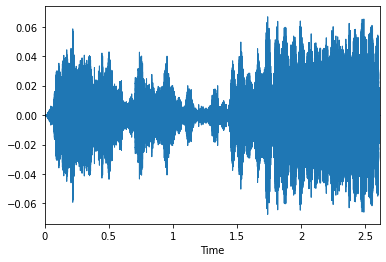

In [17]:
show_wav(enh4_wav)